In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
import seaborn as sns
%matplotlib inline
import numpy as np


from sklearn.svm import SVC

sns.set(style="darkgrid")

data = pd.read_csv('liver.csv')
data.shape

(583, 11)

In [2]:
#scores
scores = []
# models
models = []
models.append(('Logistic'))
models.append(('Random Forest Classifier'))
models.append(('XGB Classifier'))
models.append(('KNN'))
models.append(('Decision Tree Classifier'))
models.append(('SVC'))
models.append(('Gradient Boosting Classifier'))

In [3]:
data.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,lvr
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data_corr = data.corr()
data_corr

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,lvr
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254
lvr,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000


In [5]:
list(data)

['age',
 'gender',
 'TB',
 'DB',
 'alkphos',
 'sgpt',
 'sgot',
 'TP',
 'ALB',
 'A_G',
 'lvr']

age	integer	Age of the patient in years

gender	string	Patient Gender: Male or Female

TB	float	Total Bilirubin

DB	float	Direct Bilirubin

alkphos	float	Alkaline Phosphotase

sgpt	float	Alamine Aminotransferase

sgot	float	Aspartate Aminotransferase

TP	float	Total Proteins

ALB	float	Albumin

A_G	float	Ratio of Albumin and Globulin

lvr	float	Predictor Class: 1 if patient has Liver Disease and 2 if they do not


In [6]:
def NAN_percent(data,column_name):
    row_count = data[column_name].shape[0]
    empty_values = row_count - data[column_name].count()
    return (100.0*empty_values)/row_count
for i in list(data):
    print(i+':'+str(NAN_percent(data,i))+'%')

age:0.0%
gender:0.0%
TB:0.0%
DB:0.0%
alkphos:0.0%
sgpt:0.0%
sgot:0.0%
TP:0.0%
ALB:0.0%
A_G:0.0%
lvr:0.0%


In [7]:
total_rows = data.shape[0]
print(data[data.lvr.fillna('None')!='None'].lvr.value_counts())
data[data.lvr.fillna('None')!='None'].shape[0]

1    416
2    167
Name: lvr, dtype: int64


C:\Users\Manav\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


583

## Age Distribution

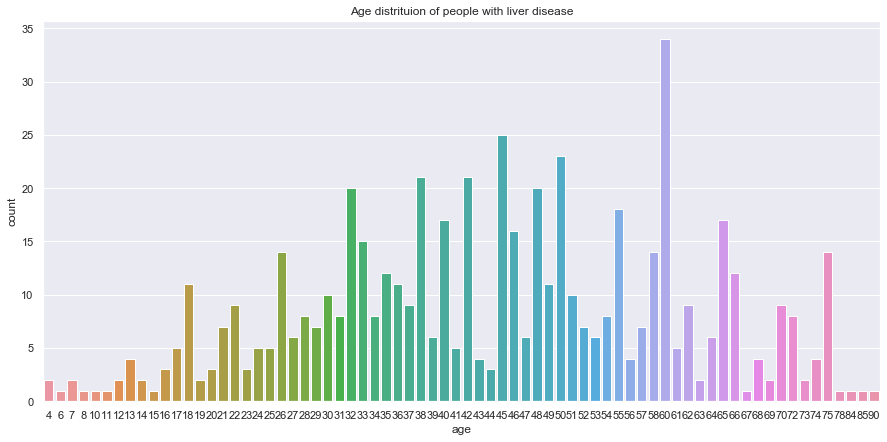

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'age',data=data)
plt.title("Age distrituion of people with liver disease")
plt.show()

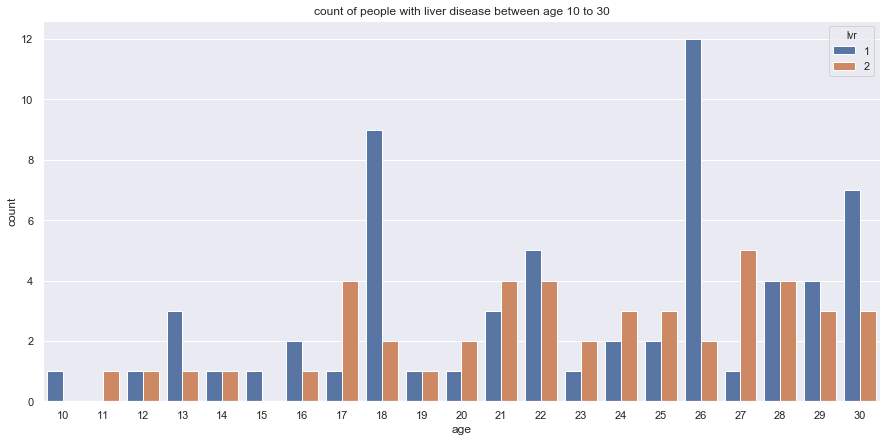

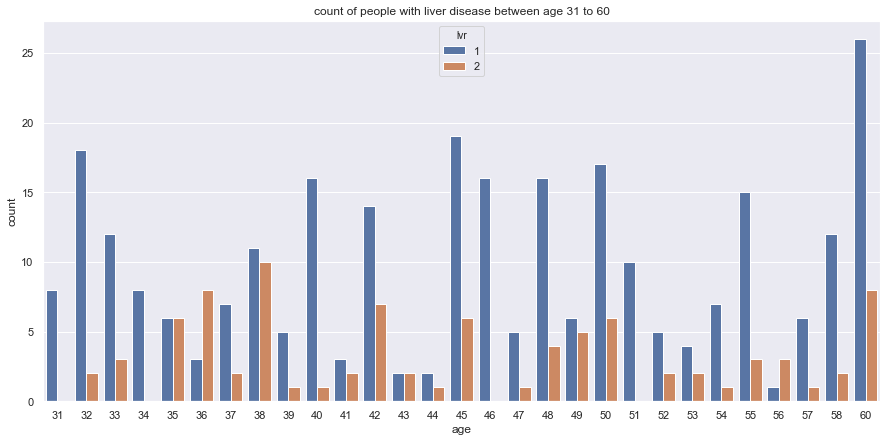

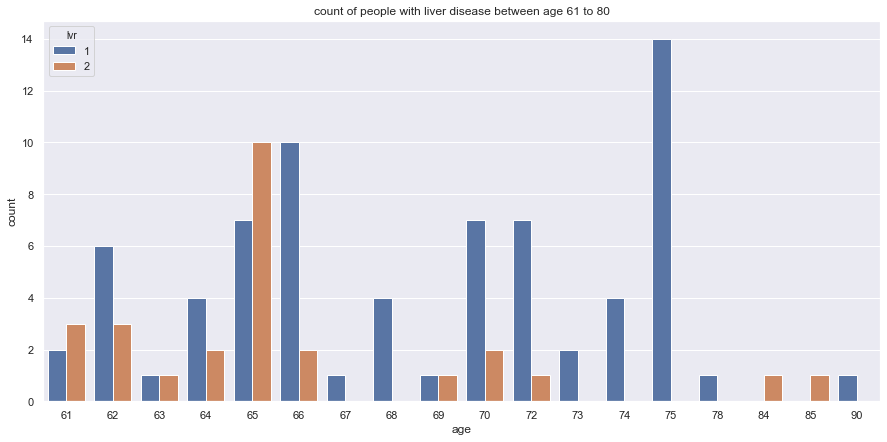

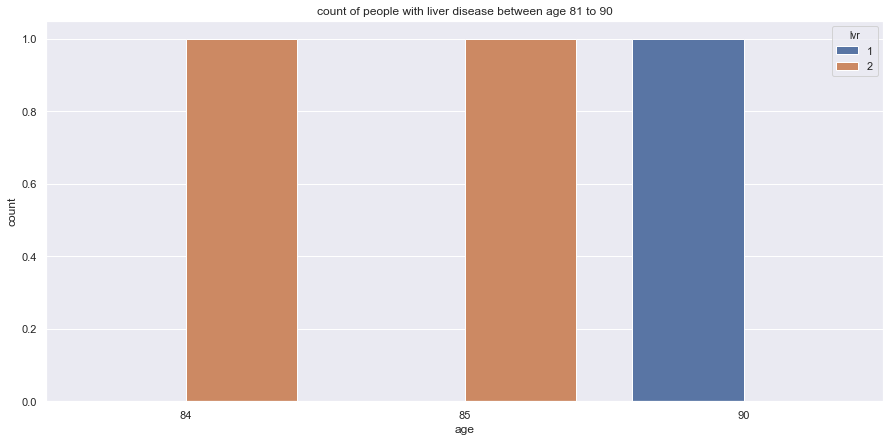

In [9]:
age_10_to_30 = data[(data["age"] >= 10) & (data["age"] <= 30)]
age_31_to_60 = data[(data["age"] >= 31) & (data["age"] <= 60)]
age_61_to_80 = data[(data["age"] >= 61) & (data["age"] <= 100)]
age_81_to_90 = data[(data["age"] >= 81) & (data["age"] <= 90)]


plt.figure(figsize=(15,7))
sns.countplot(x='age', data=age_10_to_30,hue='lvr')
plt.title("count of people with liver disease between age 10 to 30")

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=age_31_to_60,hue='lvr')
plt.title("count of people with liver disease between age 31 to 60")

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=age_61_to_80,hue='lvr')
plt.title("count of people with liver disease between age 61 to 80")

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=age_81_to_90,hue='lvr')
plt.title("count of people with liver disease between age 81 to 90")

plt.show()

In [10]:
data["gender"].unique()
def apply_1(row):
    female = ['Female','female','Trans-female', 'Cis Female', 'F', 'Woman','f', 'queer/she/they',
             'Femake','woman', 'Female ','cis-female/femme', 'Female (trans)','queer','Female (cis)',
             'femail', 'Trans woman']
    male = ['M','Male','male','m','Male-ish','maile','something kinda male?','Cis Male','Mal','Male (CIS)',
           'Make','Androgyne','Guy (-ish) ^_^','male leaning androgynous','Male ','Man','msle','Mail','cis male',
           'Malr','Cis Man']
    trans = ['non-binary','Nah','All','Enby','fluid','Genderqueer','Agender','Neuter','A little about you','p','ostensibly male, unsure what that really means']
    
    if row["gender"] in female:
        return "female"
    elif row["gender"] in male:
        return "male"
    elif row["gender"] in trans:
        return "trans"

In [11]:
data["gender"] = data.apply(apply_1,axis = 1)

In [12]:
data["gender"].unique()

array(['female', 'male'], dtype=object)

## Distribution Based on Gender

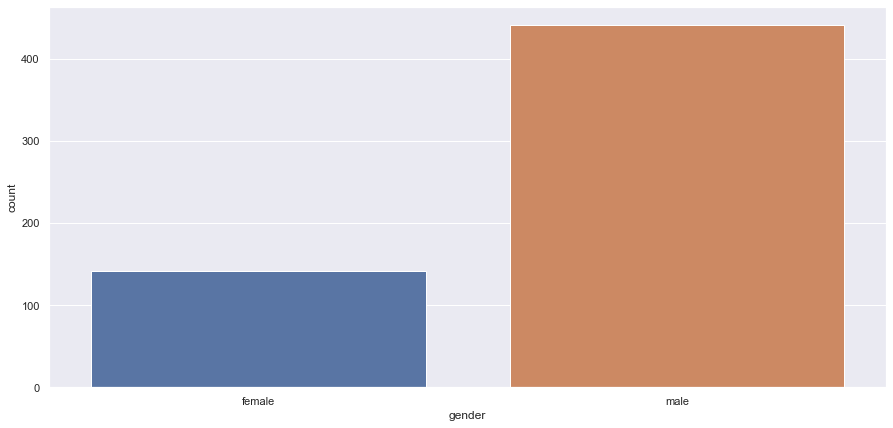

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x="gender",data=data)
plt.show()

## Analysis based on Total Bilirubin

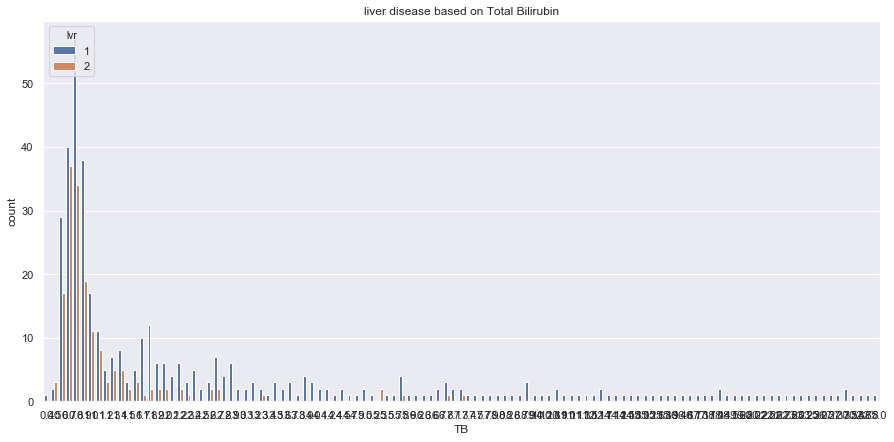

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x='TB', data=data,hue='lvr')
plt.title("liver disease based on Total Bilirubin")
plt.show()

#### We can see that low bilirubin causes more cases of liver diseases

## Analysis Based on Direct Bilirumin

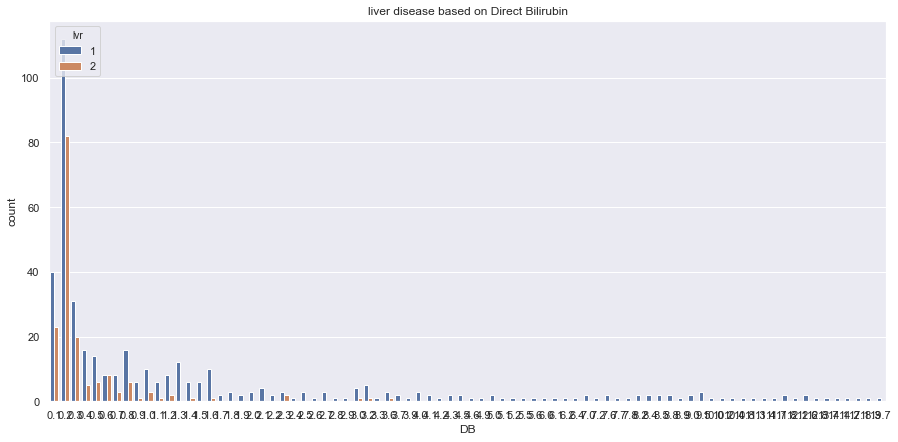

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='DB', data=data,hue='lvr')
plt.title("liver disease based on Direct Bilirubin")
plt.show()

## Direct and Indirect bilirubin

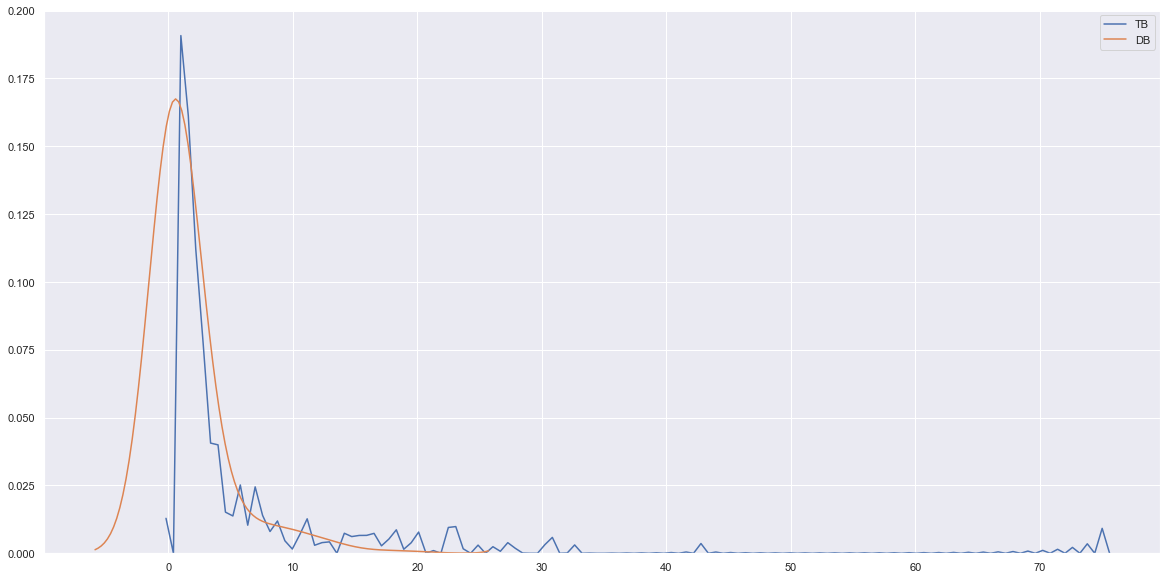

In [16]:
plt.figure(figsize=(20,10))
sns.kdeplot(data["TB"],bw = .2)
sns.kdeplot(data["DB"], bw = 2)
plt.legend()

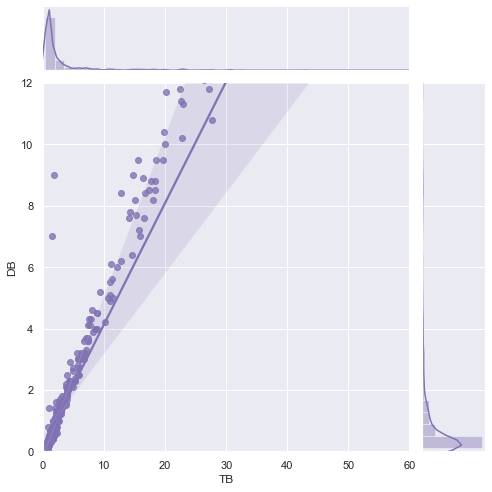

In [17]:
sns.jointplot("TB", "DB", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

## Distribution based on Alkaline Phosphotase

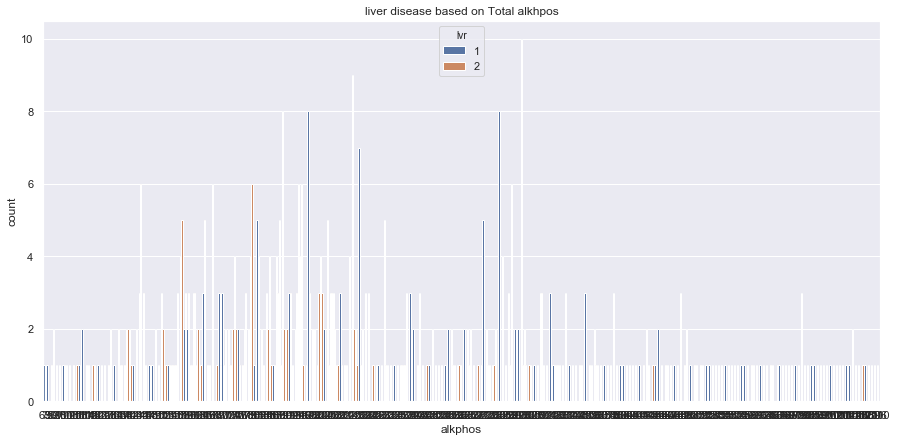

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x='alkphos', data=data,hue='lvr')
plt.title("liver disease based on Total alkhpos")
plt.show()

## Distribution based on total Alkaline Phosphotase

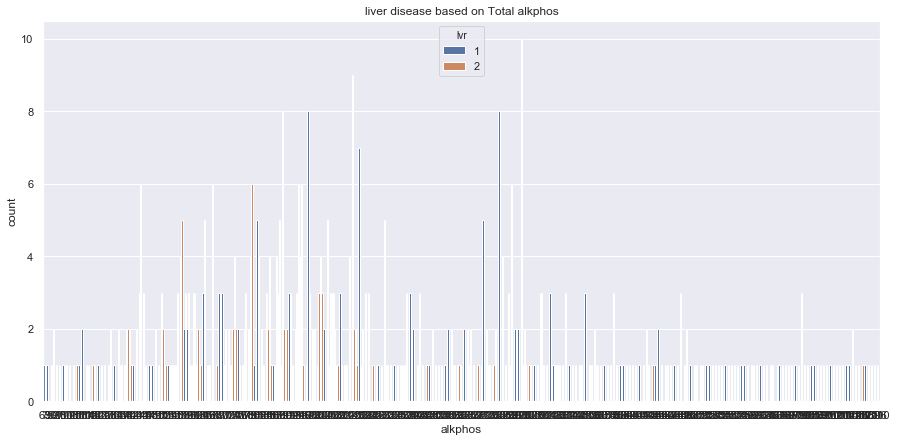

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='alkphos', data=data,hue='lvr')
plt.title("liver disease based on Total alkphos")
plt.show()

## Distribution based on Total Protein

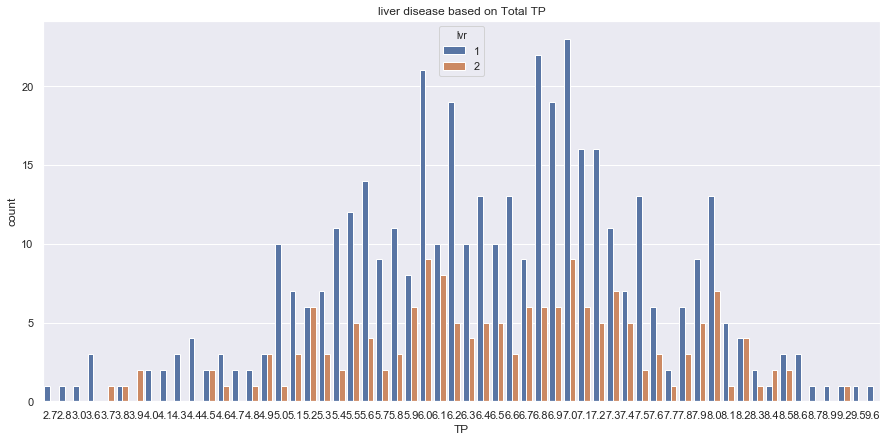

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='TP', data=data,hue='lvr')
plt.title("liver disease based on Total TP")
plt.show()

## Distribution based on total Albumin

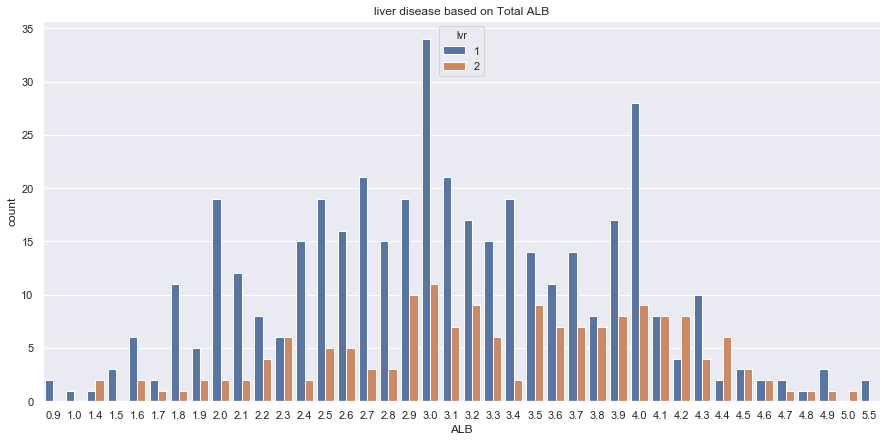

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='ALB', data=data,hue='lvr')
plt.title("liver disease based on Total ALB")
plt.show()

## Distribution based on Alamine Aminotransferase

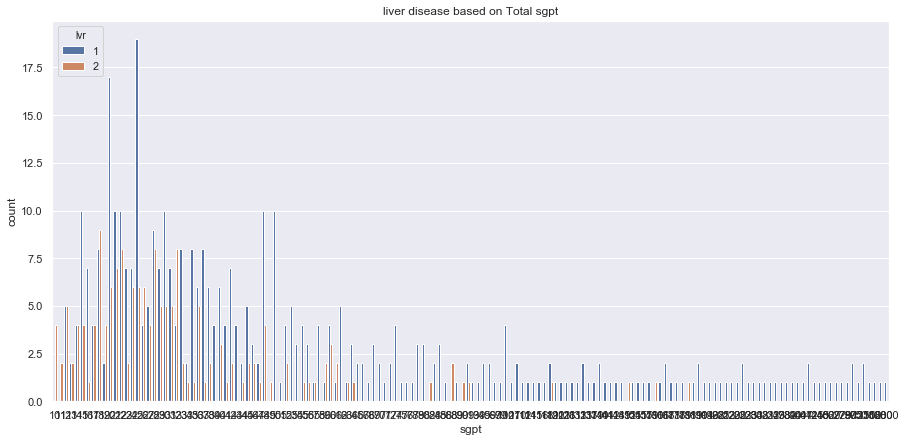

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='sgpt', data=data,hue='lvr')
plt.title("liver disease based on Total sgpt")
plt.show()

## Distribution based on Aspartate Aminotransferase

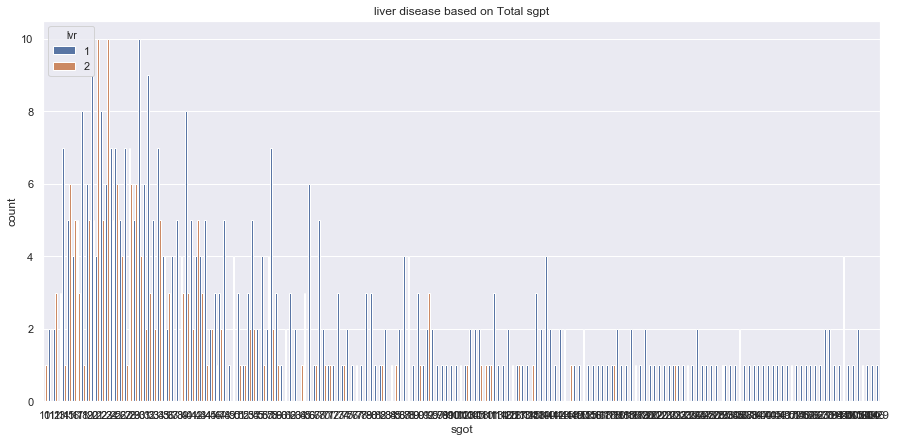

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='sgot', data=data,hue='lvr')
plt.title("liver disease based on Total sgpt")
plt.show()

## Distribution based on Ratio of Albumin and Globulin

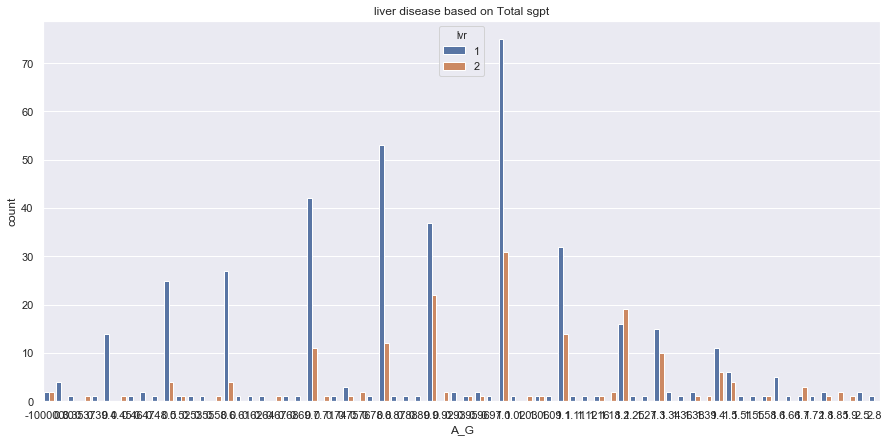

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='A_G', data=data,hue='lvr')
plt.title("liver disease based on Total sgpt")
plt.show()

## Joint grid based on liver disease and Albumin and Globulin Ratio

C:\Users\Manav\Anaconda3\envs\tnsor\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'data_corr'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1440x720 with 0 Axes>

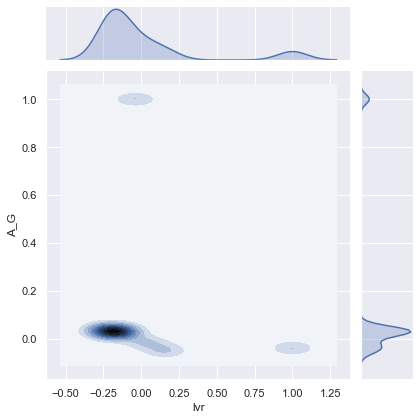

In [25]:
plt.figure(figsize=(20,10))
sns.jointplot(x=data_corr["lvr"],y=data_corr["A_G"],data_corr = data,kind="kde")

## PairPlot Representation

C:\Users\Manav\Anaconda3\envs\tnsor\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Manav\Anaconda3\envs\tnsor\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


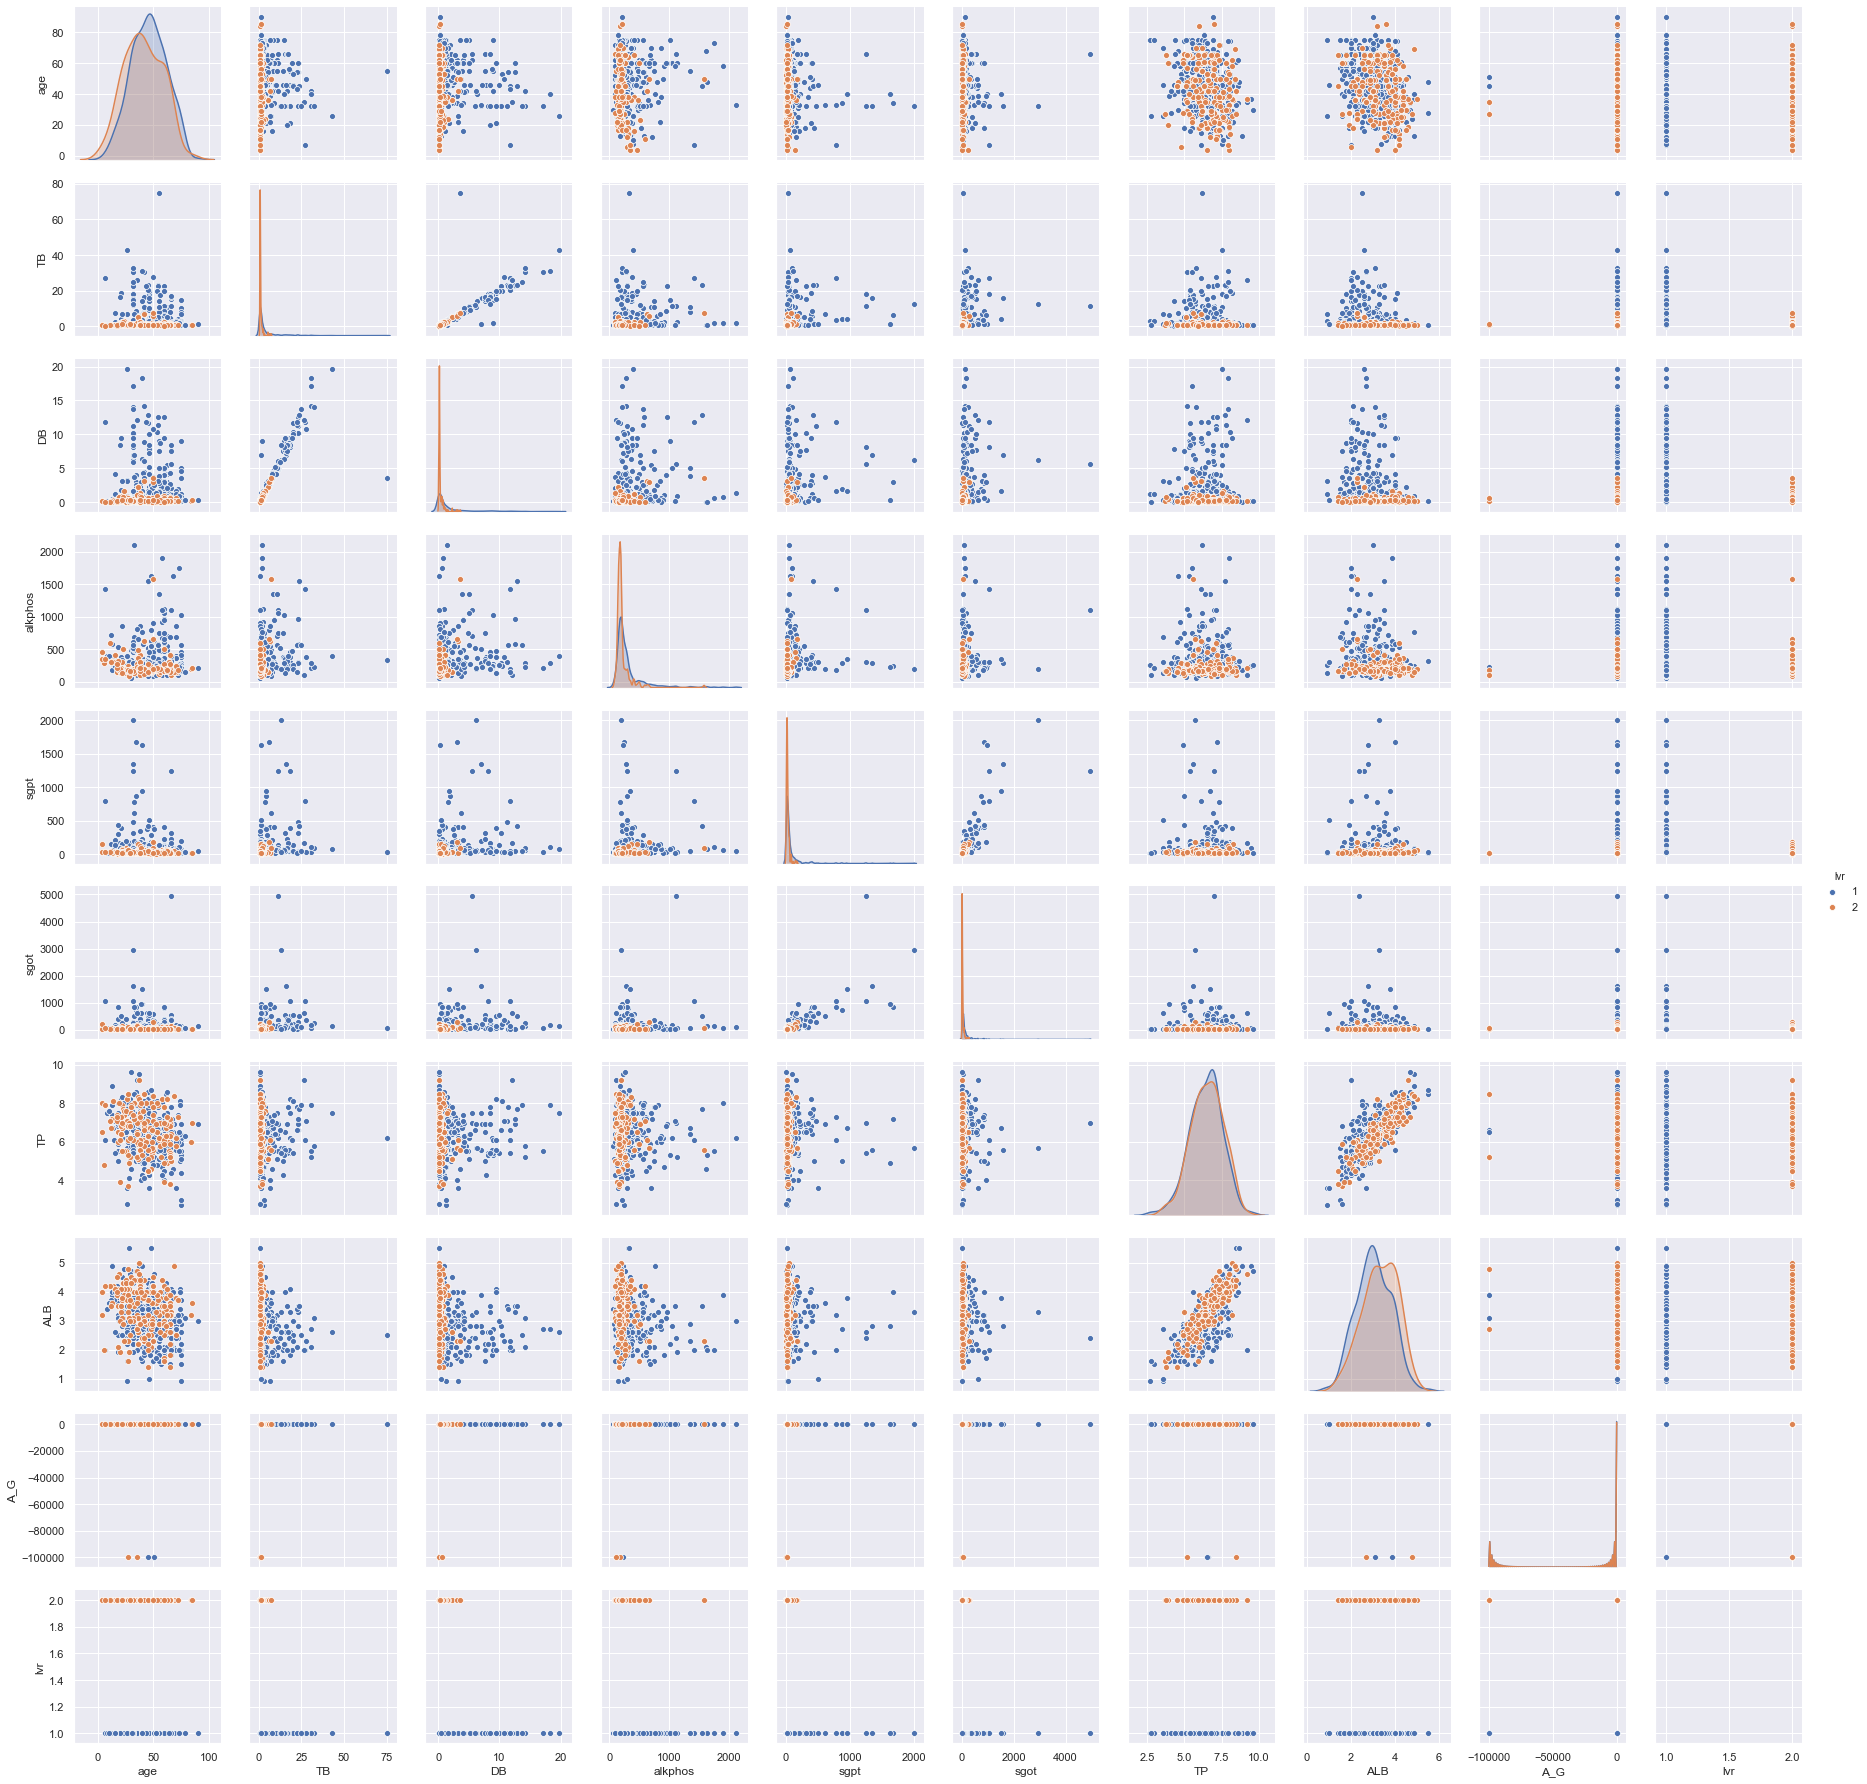

In [26]:
sns.pairplot(data, hue="lvr")

# Models used for Prediction

In [27]:
for i in data.columns:
    data[i] = pd.to_numeric(data[i], errors='coerce')

In [28]:
data.isnull().sum()

age          0
gender     583
TB           0
DB           0
alkphos      0
sgpt         0
sgot         0
TP           0
ALB          0
A_G          0
lvr          0
dtype: int64

In [29]:
result = pd.get_dummies(data['gender'],drop_first=True)
data = data.drop('gender',axis=1)
data = pd.concat([data,result],axis=1)
data

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,lvr
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [30]:
data =data.dropna(how='any')

In [31]:
def partition(x):
    if x == 2:
        return 0
    return 1

data['lvr'] = data['lvr'].map(partition)

In [32]:
X = data.drop(labels='lvr',axis=1)
y = data['lvr']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

# Model 1:- Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train, y_train)


C:\Users\Manav\Anaconda3\envs\tnsor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logistic.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
scores.append(score)

print(score)

0.7948717948717948


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred).T

array([[10,  2],
       [22, 83]], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.31      0.45        32
           1       0.79      0.98      0.87        85

    accuracy                           0.79       117
   macro avg       0.81      0.64      0.66       117
weighted avg       0.80      0.79      0.76       117



# Model 2:- Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2,random_state=0,n_estimators = 200)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
scores.append(score)
print(score)

0.717948717948718


In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      0.99      0.84        85

    accuracy                           0.72       117
   macro avg       0.36      0.49      0.42       117
weighted avg       0.53      0.72      0.61       117



In [42]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  1],
       [32, 84]], dtype=int64)

# Model:-3 XBG Classifier

In [43]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0,booster="dart",max_depth=1,n_estimators =200,n_jobs=600,num_parallel_tree=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=600, num_parallel_tree=3,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
scores.append(score)
print(score)

0.7350427350427351


In [46]:
confusion_matrix(y_test, y_pred).T

array([[11, 10],
       [21, 75]], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.34      0.42        32
           1       0.78      0.88      0.83        85

    accuracy                           0.74       117
   macro avg       0.65      0.61      0.62       117
weighted avg       0.71      0.74      0.72       117



# Model:-4 K-Nearest Neighbours

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=466)

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=466, p=2,
                     weights='uniform')

In [49]:
y_pred = model.predict(X_test)

In [50]:
score=accuracy_score(y_test, y_pred)
scores.append(score)

In [51]:
confusion_matrix(y_test, y_pred)

array([[ 0, 32],
       [ 0, 85]], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.73      1.00      0.84        85

    accuracy                           0.73       117
   macro avg       0.36      0.50      0.42       117
weighted avg       0.53      0.73      0.61       117



C:\Users\Manav\Anaconda3\envs\tnsor\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model:-5 Decision Tree Classifier 

In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_leaf_nodes=50,random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [54]:
y_pred = model.predict(X_test)

In [55]:
score = accuracy_score(y_pred, y_test)
scores.append(score)

In [56]:
confusion_matrix(y_test, y_pred).T

array([[15, 17],
       [17, 68]], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        32
           1       0.80      0.80      0.80        85

    accuracy                           0.71       117
   macro avg       0.63      0.63      0.63       117
weighted avg       0.71      0.71      0.71       117



# Model:-6 SVC

In [58]:
from sklearn.svm import SVC

model = SVC(C=3, gamma=0.2,degree=5,random_state=5,cache_size=200)
model.fit(X_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
y_pred = model.predict(X_test)

In [60]:
score=accuracy_score(y_pred, y_test)
scores.append(score)

In [61]:
confusion_matrix(y_test, y_pred)

array([[ 1, 31],
       [ 0, 85]], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        32
           1       0.73      1.00      0.85        85

    accuracy                           0.74       117
   macro avg       0.87      0.52      0.45       117
weighted avg       0.81      0.74      0.63       117



# Model:-7 Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
                    random_state = 1,
                    verbose = 0,
                    n_estimators = 99,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 2
                   )

model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.9, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=99,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y_pred = model.predict(X_test)

In [65]:
score=accuracy_score(y_pred, y_test)
scores.append(score)
print(score)

0.7264957264957265


In [66]:
scores

[0.7948717948717948,
 0.717948717948718,
 0.7350427350427351,
 0.7264957264957265,
 0.7094017094017094,
 0.7350427350427351,
 0.7264957264957265]

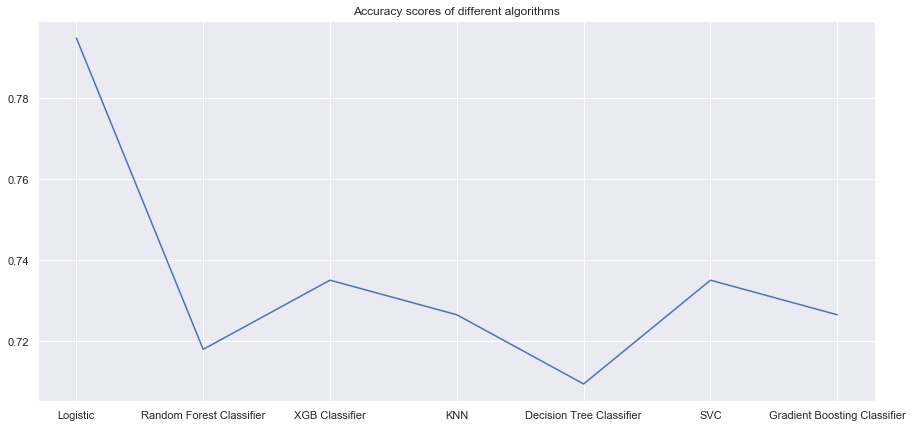

In [67]:
plt.figure(figsize=(15,7))
plt.title("Accuracy scores of different algorithms")
plt.plot(models,scores)

In [92]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
import tensorflow.keras.backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [94]:
classifier = Sequential()

In [95]:
classifier.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=9))

#Second  Hidden Layer
classifier.add(Dense(50, activation='relu', kernel_initializer='he_uniform',input_dim=25))
classifier.add(Dense(25, activation='relu', kernel_initializer='he_uniform',input_dim=50))
classifier.add(Dense(9, activation='relu', kernel_initializer='he_uniform',input_dim=25))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))

In [96]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [97]:
classifier.fit(X_train,y_train,batch_size=466,epochs=2000)

Train on 466 samples
Epoch 1/2000
466/466 [==============================] - 0s 867us/sample - loss: 0.6266 - accuracy: 0.6524
Epoch 2/2000
466/466 [==============================] - 0s 10us/sample - loss: 0.6147 - accuracy: 0.6781
Epoch 3/2000
466/466 [==============================] - 0s 10us/sample - loss: 0.6043 - accuracy: 0.6803
Epoch 4/2000
466/466 [==============================] - 0s 10us/sample - loss: 0.5952 - accuracy: 0.6824
Epoch 5/2000
466/466 [==============================] - 0s 9us/sample - loss: 0.5875 - accuracy: 0.6867
Epoch 6/2000
466/466 [==============================] - 0s 9us/sample - loss: 0.5806 - accuracy: 0.6867
Epoch 7/2000
466/466 [==============================] - 0s 9us/sample - loss: 0.5746 - accuracy: 0.6953
Epoch 8/2000
466/466 [==============================] - 0s 9us/sample - loss: 0.5691 - accuracy: 0.6996
Epoch 9/2000
466/466 [==============================] - 0s 12us/sample - loss: 0.5641 - accuracy: 0.7017
Epoch 10/2000
466/466 [==============

In [98]:
y_pred=classifier.predict_classes(X_test)


In [99]:
score=accuracy_score(y_pred, y_test)
print(score)

0.717948717948718
